In [4]:
import sys
sys.path.insert(0,'..')
from plotting import stack
import importlib
import pandas as pd
import glob
from data.preproc import set_weights

In [5]:
samples = {}
sample_names = glob.glob("/home/centos/mount_point/data/samples/*.h5")
for s in sample_names:
    if "cutflow" in s: continue
    name = s.split("/")[-1][:-3]
    samples[name] = pd.read_hdf(s)

In [6]:
set_weights(samples, ["btag"])

In [9]:
variables = [
    {"var_name" : "PV_npvs", "bins" : 25, "xlow" : 0., "xup" : 25, "xtitle" : "primary vertices", "max_sf": 100, "log":True},
    {"var_name" : "MET_met", "bins" : 30, "xlow" : 0., "xup" : 400, "xtitle" : "MET [GeV]", "max_sf": 10., "log":True},
    {"var_name" : "Jet_pt", "bins" : 30, "xlow" : 0., "xup" : 500., "xtitle" : r"$p_{\mathrm{T}}(\mathrm{jet})$ [GeV]", "max_sf": 15, "log":True},
    {"var_name" : "Jet_eta", "bins" : 30, "xlow" : -3., "xup" : 3., "xtitle" : r"$\eta(\mathrm{jet})$", "max_sf": 12, "log":False},
    {"var_name" : "Tau_pt", "bins" : 30, "xlow" : 0., "xup" : 350, "xtitle" : r"$p_{T}(\mathrm{\tau_h}$) [GeV]", "max_sf": 15, "log":True},
    {"var_name" : "Tau_eta", "bins" : 30, "xlow" : -3., "xup" : 3., "xtitle" : r"$\eta(\tau_h)$", "max_sf": 10, "log":False},
    {"var_name" : "aplanarity", "bins" : 20, "xlow" : -0.1, "xup" : 0.5, "xtitle" : "aplanarity", "max_sf": 15, "log":True},
    {"var_name" : "ht", "bins" : 20, "xlow" : 0., "xup" : 1600., "xtitle" : r"$H_{\mathrm{T}}$ [GeV]", "max_sf": 10, "log":True},
    {"var_name" : "chargeEta", "bins" : 20, "xlow" : -3., "xup" : 3., "xtitle" : r"$q \times |\eta(\tau_h)|$", "max_sf": 10, "log":False},
    {"var_name" : "deltaPhiTauMet", "bins" : 20, "xlow" : 0., "xup" : 3.2, "xtitle" : r"$\Delta \phi(\tau_h, \mathrm{MET})$", "max_sf": 10, "log":False},
    {"var_name" : "mt", "bins" : 20, "xlow" : 0., "xup" : 300., "xtitle" : r"$M_{\mathrm{T}}(\tau_h, \mathrm{MET})$ [GeV]", "max_sf": 15, "log":True},
    {"var_name" : "mTauJet", "bins" : 20, "xlow" : 0., "xup" : 2500., "xtitle" : r"$M(\tau_h, \mathrm{jets})$ [GeV]", "max_sf": 50, "log":True},
    {"var_name" : "nJets", "bins" : 8, "xlow" : 3., "xup" : 11., "xtitle" : "number of jets", "max_sf": 50, "log":True},
    {"var_name" : "sphericity", "bins" : 20, "xlow" : 0., "xup" : 1.0, "xtitle" : "sphericity", "max_sf": 50, "log":True}
]    

In [12]:

variables = [
    {"var_name" : "mt", "bins" : 20, "xlow" : 0., "xup" : 300., "xtitle" : r"$M_{\mathrm{T}}(\tau_h, \mathrm{MET})$ [GeV]", "max_sf": 15, "log":True},
]   

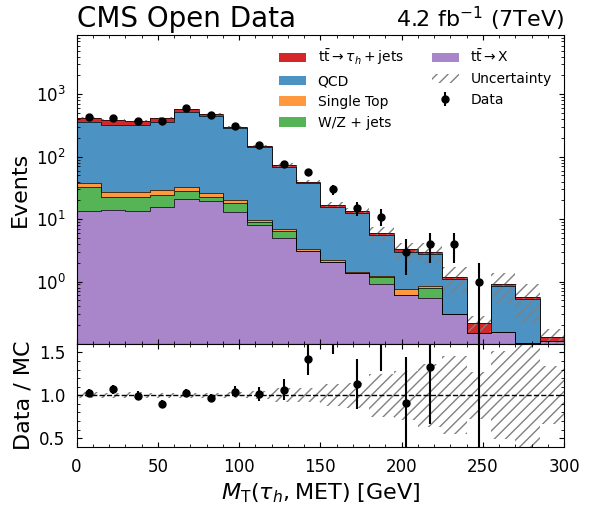

In [13]:
importlib.reload(stack)
path = "/home/centos/cmsopen/inferno/stacks"
for var in variables:
    stack.plot_from_pd(samples, var["var_name"], bins=var["bins"], 
                       range=(var["xlow"], var["xup"]), title=var["xtitle"], max_scale = var["max_sf"],
                       log_scale=var["log"], store=True, path=path)